<a href="https://colab.research.google.com/github/farooqosama908-dot/MAT-420/blob/main/HW2_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

We will do a multilinear regression numerical features for our Data Set "Wine Quality" from Kaggle.

In [5]:
df = pd.read_csv("wine-quality-white-and-red.csv")
print(df.head())
print(df.info())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [6]:
target = "alcohol"
X = df.select_dtypes(include=[np.number]).drop(columns=[target])
y = df[target]

In [7]:
X = X.dropna()
y = y.loc[X.index]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


In [13]:
print("R2:", r2_score(y_test, y_pred))

R2: 0.8239854465255387


In [14]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values("Coefficient", key=abs, ascending=False)

print(coef_df)


                 Feature  Coefficient
7                density  -574.616813
8                     pH     2.789630
1       volatile acidity     1.559362
9              sulphates     1.284018
0          fixed acidity     0.532893
2            citric acid     0.467256
4              chlorides    -0.428424
3         residual sugar     0.195375
10               quality     0.141892
6   total sulfur dioxide    -0.004241
5    free sulfur dioxide    -0.000166


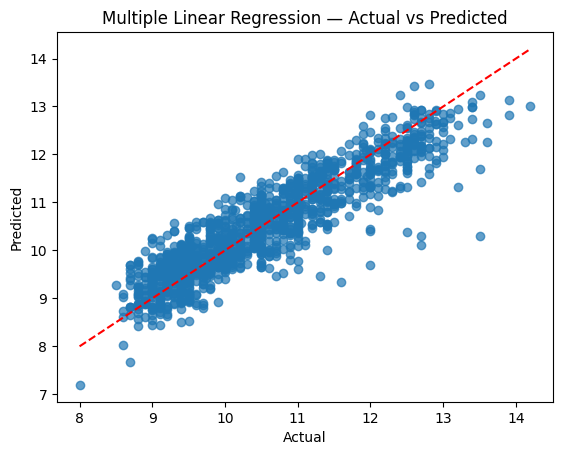

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Linear Regression — Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()
